<a href="https://colab.research.google.com/github/suryansh-sinha/DeepLearningIntro/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.1 kB/s 
     |████████████████████████████████| 1.6 MB 35.0 MB/s 
     |████████████████████████████████| 5.8 MB 30.5 MB/s 
     |████████████████████████████████| 438 kB 37.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
# Import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing our dataset into a pandas dataframe.
dataset = pd.read_csv('Churn_Modelling.csv')
# Prints the first 5 rows of the dataset.
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dropping irrelevant columns from the dataset.
dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1, inplace=True)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Separating the dataset into X and y.
X = dataset.iloc[:,:10] # iloc stands for index location.
y = dataset.iloc[:,10]  # Gives the dataset at the mentioned [row, column]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# We can use one-hot encoding to encode categorical features such as Geography and Gender.
geo = pd.get_dummies(X['Geography'])
geo.head()
# So, we can see that wherever france is the category, we get 1 in france, rest 0.
# Now, we dont need all 3 features since if france and germany are 0, we know it's spain.
# So, we drop spain from the list.
geo.drop(['Spain'], axis=1, inplace=True)

In [ ]:
# Doing the same with gender.
gender = pd.get_dummies(X['Gender'])
gender.drop(['Female'], axis=1, inplace=True) # Removing female because if it's not male, it's female.

In [ ]:
geo.head()

,France,Germany
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Now concatenating these features with the original dataframe.
X.drop(['Geography', 'Gender'],axis=1,inplace=True) # Removing Gender and Geography from dataset.
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geo,gender],axis=1)  # Concatenating encoded geography and gender to X

In [ ]:
# Splitting the dataset into training and testing.
from sklearn.model_selection import train_test_split
# test_size determines the ratio in which dataset is split.
# random_state controls shuffling applied to data before splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We need to do feature scaling too to improve our model's performance.
# Interview question --> Which algorithms require feature scaling ?
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# fit() calculates the mean and standard deviation for later scaling.
# fit_transform() scales the data by doing above function + scaling and outputs a numpy array.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.01460667,
        -0.5698444 , -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.01460667,
         1.75486502,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.98560362,
        -0.5698444 , -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.98560362,
        -0.5698444 ,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.01460667,
        -0.5698444 , -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.01460667,
         1.75486502, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.01460667,
         1.75486502, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.98560362,
        -0.5698444 , -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.01460667,
        -0.5698444 , -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -1.01460667,
        -0.5698444 ,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -1.01460667,
         1.75486502,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -1.01460667,
         1.75486502,  0.91601335]])

In [ ]:
X_train.shape # Outputs the dimensionality of the array. (rows, columns)

(8000, 11)

In [ ]:
# Data Preprocessing and Scaling is done. Now we are creating the model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input

In [ ]:
# Initializing the ANN
model = Sequential()

# Adding the first layer.
# model.add(Dense(units=11))
model.add(Input(shape=(11,)))
# First Hidden Layer
model.add(Dense(11, activation='relu')) 
# Second Hidden Layer
model.add(Dense(22, activation='relu')) 
# Third Hidden Layer
model.add(Dense(11, activation='relu')) 
# Output Layer
model.add(Dense(1, activation='sigmoid'))  

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(opt,loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Implementing Early Stopping.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", # The value in which change is to be monitored.
    min_delta=0.0001, # Minimum value change required to keep model going. If lower, training stops.
    patience=20,  # Number of epochs after which if no improvement training will be stopped.
    verbose=1,  # Displays a message when callback happens.
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4300 - accuracy: 0.8184 - val_loss: 0.3942 - val_accuracy: 0.8368
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3715 - accuracy: 0.8507 - val_loss: 0.3678 - val_accuracy: 0.8482
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3529 - accuracy: 0.8578 - val_loss: 0.3720 - val_accuracy: 0.8466
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8574 - val_loss: 0.3735 - val_accuracy: 0.8459
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3497 - accuracy: 0.8567 - val_loss: 0.3824 - val_accuracy: 0.8413
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3451 - accuracy: 0.8572 - val_loss: 0.3584 - val_accuracy: 0.8501
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3419 - accuracy: 0.8608 - val_loss: 0.3717 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

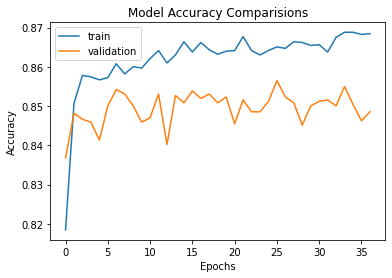

In [ ]:
# Summarize the history for accuracy comparing test and validation accuracies.
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy Comparisions')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')
plt.show()

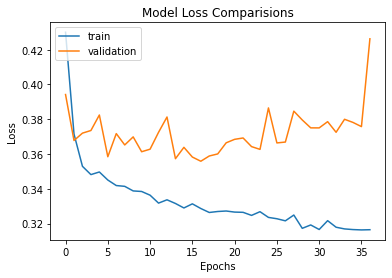

In [ ]:
# Summarizing the loss graphs of training and validation data.
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss Comparisions')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Making predictions for test data and finding out model score.
y_pred = model.predict(X_test)
# Converting outputs to 0,1.
y_pred = (y_pred >= 0.5)  # If it returns true, 1 gets into the place, else 0 gets into place.

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Make the confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1535,   60],
       [ 220,  185]])

In [ ]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.86

In [ ]:
# Get the weights and biases.
model.get_weights()

[array([[ 0.23814537,  0.8024772 , -0.6894393 ,  0.6817517 ,  0.06274479,
         -0.22202761,  0.22843863, -0.19576392,  0.41304517,  0.06886685,
         -0.04079581],
        [-1.4326844 , -1.3320923 ,  0.7385713 , -1.1469262 , -3.2848597 ,
          1.8481166 ,  0.7161012 , -0.18521088, -1.9559386 ,  2.4079711 ,
          2.6460662 ],
        [ 1.2983913 ,  2.6585977 , -0.2370825 ,  1.1247585 ,  0.15624611,
         -0.2895325 ,  0.23752178,  0.5037362 , -0.0268241 ,  0.47608995,
          0.29130054],
        [-0.61422056,  1.2356852 ,  0.77560055, -1.5152206 ,  1.007925  ,
         -1.0127221 , -1.3842582 , -3.733119  , -0.97592556,  0.5627294 ,
          0.09899436],
        [ 1.7374424 , -2.651214  ,  3.055472  ,  0.59031963,  0.7845162 ,
         -1.0363017 , -2.5865762 , -0.62081015, -1.1921581 , -2.2284138 ,
          3.2645192 ],
        [ 0.5701358 ,  0.07003671, -0.1084263 , -1.131785  , -0.11824758,
         -0.01917164,  0.34032643, -0.45588234, -0.794057  , -0.6227351